#### The goal is to predict the salary of data related positions based on location, company review and job title

#### We will implement the model based on CRISP methodology

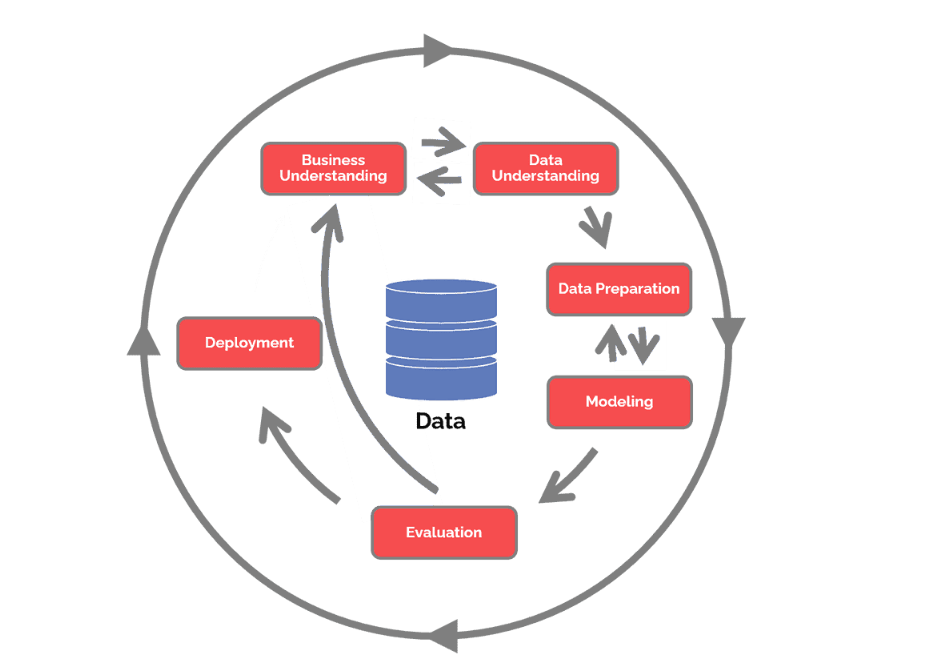

## Import dataset

In [241]:
from google.colab import files

In [242]:
uploaded = files.upload()

Saving df.csv to df (2).csv


## Import Libraries

##### **pandas**: data processing
##### **matplotlib.pyplot**: data visualization
##### **seaborn**: data visualization
##### **sklearn.model_selection import train_test_split**: build model, train and test
##### **sklearn.linear_model import LinearRegression**: build model
##### **sklearn.metrics import mean_absolute_error**: evaluate model
##### **pickle**: export model

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pickle

### Read data

In [244]:
df_raw = pd.read_csv('df.csv')

### Data Exploration and underestanding

In [245]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


The following information obtained:

1. Job titles can be categorized based on the words they contain such as "director", "data analyst", ...
2. Minimum and maximum salaries can be extracted from the salary estimate column and then averaged to create a new average salary column which will be the target variable
3. Company names is not much important to predcit avergae salary
4. The state can be extracted from the location column
5. Because there are too many unknowns in the Revenue column, we will not use that column

## Data Exploration: Assess Data


High level summary of data:

*   column names
*   data types (detected by Python)
*   number of NULL values for each column


In [246]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


## Data preprocessing/Data Cleaning

In [247]:
# remove instances salary estimate = -1 (instances without salary estimate)
df = df_raw[df_raw['Salary Estimate'] != '-1']

In [248]:
# remove instnaces have hour rate for salary estimate
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [249]:
# remove $ from salary estimate
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.replace('$',''))

In [250]:
# remove a-z characters from salary estimate
import re
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[a-zA-Z ]', '', x))

In [251]:
# remove () from salary estimate
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.replace('(','').replace(')',''))

In [252]:
# remove . from salary estimate
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.replace('.',''))

In [253]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,111-181,3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",111-181,4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,111-181,-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,111-181,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",111-181,3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5881,Information Scientist,38-64,3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD)
5882,Supervisory Research Health Scientist,47-89,4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable
5883,Senior SAS Programmer (Scientist),66-113,4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable
5886,Senior Data Analyst - Product Analytics (open ...,67-111,4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD)


In [254]:
# split
df['Salary Estimate_Split'] = df['Salary Estimate'].apply(lambda x: x.split('-'))

In [255]:
# split salary estimate into a list has two items: minimum, maximum. Minumum should be in 0 index and Maximum in 1.
def splitter_max_min(a):
  lst =[]
  for item in a:
    if item.isnumeric() == True:
      lst.append(int(item))
  return(lst)

In [256]:
df['Salary Estimate_Split'] = df['Salary Estimate_Split'].apply(splitter_max_min)

In [257]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate_Split
0,Senior Data Scientist,111-181,3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,"[111, 181]"
1,"Data Scientist, Product Analytics",111-181,4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,"[111, 181]"
2,Data Science Manager,111-181,-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,"[111, 181]"
3,Data Analyst,111-181,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"[111, 181]"
4,"Director, Data Science",111-181,3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"[111, 181]"
...,...,...,...,...,...,...,...,...,...,...,...,...
5881,Information Scientist,38-64,3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),"[38, 64]"
5882,Supervisory Research Health Scientist,47-89,4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,"[47, 89]"
5883,Senior SAS Programmer (Scientist),66-113,4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"[66, 113]"
5886,Senior Data Analyst - Product Analytics (open ...,67-111,4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"[67, 111]"


In [258]:
# assess the column salary estimate split is clean
df[df['Salary Estimate_Split'].apply(lambda x:len(x)!=2)]

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate_Split


In [259]:
# create two new columns for min and max salary estimate
df['Min_salary'] = df['Salary Estimate_Split'].apply(lambda x: min(x))
df['Max_salary'] = df['Salary Estimate_Split'].apply(lambda x: max(x))

In [260]:
# create a column for average salary estimate
from numpy import average
df['Average_salary']  = df['Salary Estimate_Split'].apply(lambda x: average(x))

In [261]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate_Split,Min_salary,Max_salary,Average_salary
0,Senior Data Scientist,111-181,3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,"[111, 181]",111,181,146.0
1,"Data Scientist, Product Analytics",111-181,4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,"[111, 181]",111,181,146.0
2,Data Science Manager,111-181,-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,"[111, 181]",111,181,146.0
3,Data Analyst,111-181,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"[111, 181]",111,181,146.0
4,"Director, Data Science",111-181,3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"[111, 181]",111,181,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,Information Scientist,38-64,3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),"[38, 64]",38,64,51.0
5882,Supervisory Research Health Scientist,47-89,4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,"[47, 89]",47,89,68.0
5883,Senior SAS Programmer (Scientist),66-113,4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"[66, 113]",66,113,89.5
5886,Senior Data Analyst - Product Analytics (open ...,67-111,4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"[67, 111]",67,111,89.0


In [262]:
# create a new column for US states
df['State'] = df['Location'].apply(lambda x:x.split()[-1])

In [263]:
# assess the column state to make sure it's clean
df['State'].value_counts()

CA         1311
TX         1243
OH          408
IL          368
PA          324
NY          313
AZ          297
FL          261
MA          239
NJ          232
MI          203
VA          131
DC           85
MD           61
DE           10
Kingdom       4
WI            3
GA            1
ME            1
KY            1
NM            1
NH            1
IN            1
NC            1
Name: State, dtype: int64

In [264]:
# remove the instance state = Kingdom
df = df[df['State']!='Kingdom']

In [265]:
def title_organizer(x):
        """
        This function organizes the job title
        """
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'business intelligence' in x:
            return 'business intelligence'
        elif 'software' in x:
            return 'software'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'data analyst' in x:
            return 'data analyst'
        elif 'scientist' in x:
            return 'scientist'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'other'

In [266]:
# clean job titile and categorize them into groups
df['Job Title'] = df['Job Title'].apply(title_organizer)

<ipython-input-266-5927ea8102cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].apply(title_organizer)


In [267]:
# summary of the new job title groups
df['Job Title'].value_counts()

data scientist               1992
data analyst                 1008
scientist                     914
data engineer                 858
other                         287
machine learning engineer     177
business intelligence         104
manager                        73
researcher                     35
software                       26
director                       19
deep learning engineer          3
Name: Job Title, dtype: int64

In [268]:
# remove instances rate = -1
df = df[df['Rating']!=-1]

## Final dataset to build the model

In [276]:
cleaned_df = df[['Job Title','Rating','Average_salary','State']]

In [277]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


## Data Visualization/ Exploratory Data Analysis(EDA)


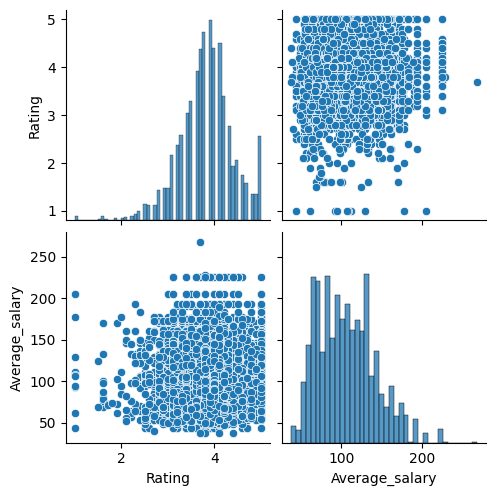

In [278]:
sns.pairplot(cleaned_df)

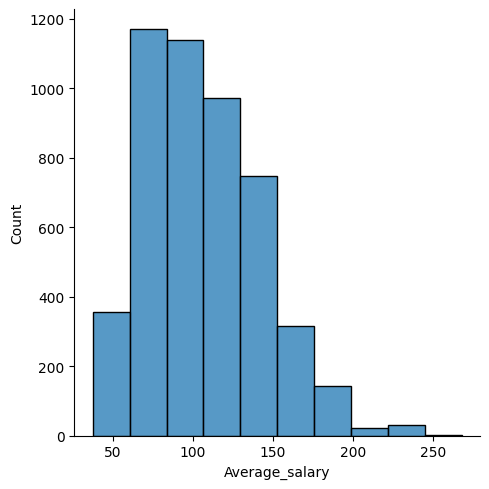

In [279]:
# histogram for avergae salary
sns.displot(x='Average_salary', data= cleaned_df, bins = 10)

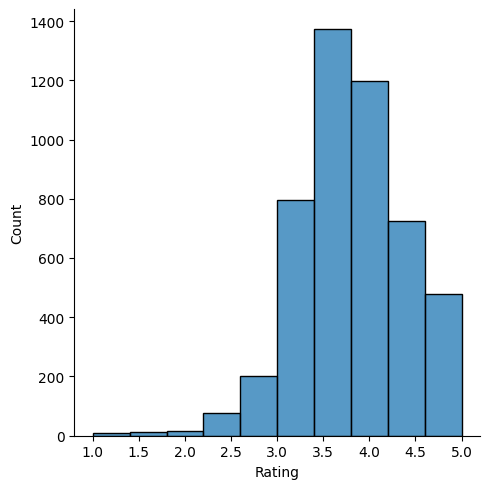

In [280]:
# histogram for rating
sns.displot(x='Rating', data= cleaned_df, bins = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'data analyst'),
  Text(2, 0, 'researcher'),
  Text(3, 0, 'scientist'),
  Text(4, 0, 'data engineer'),
  Text(5, 0, 'other'),
  Text(6, 0, 'manager'),
  Text(7, 0, 'machine learning engineer'),
  Text(8, 0, 'business intelligence'),
  Text(9, 0, 'director'),
  Text(10, 0, 'software'),
  Text(11, 0, 'deep learning engineer')])

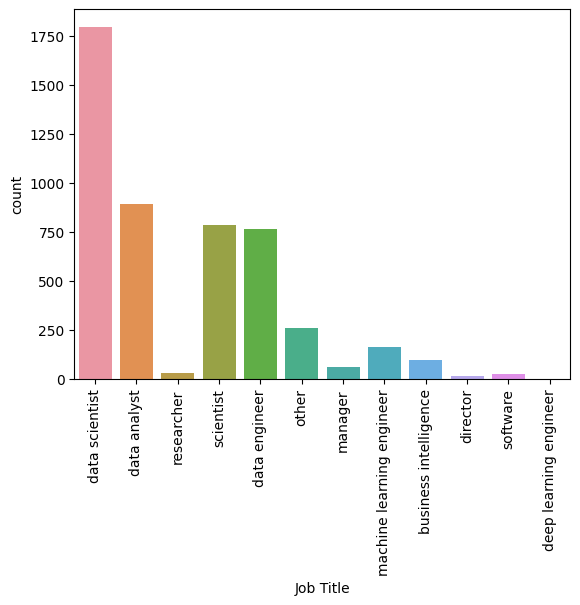

In [282]:
# bar graph to show numbers by job title
sns.countplot(x='Job Title', data= cleaned_df)
plt.xticks(rotation= 90)

<Axes: xlabel='Rating', ylabel='Average_salary'>

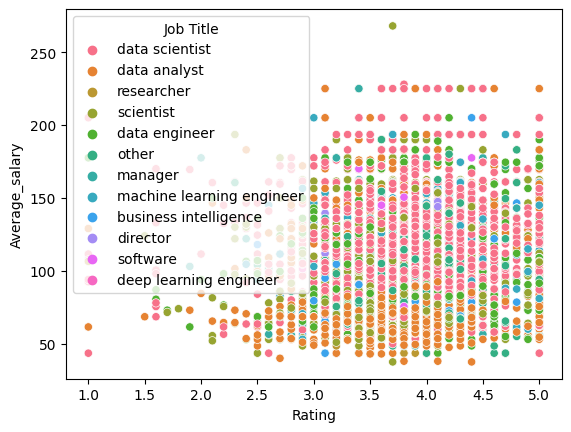

In [283]:
# scatter plot to show relation between average salary and rating, job title is used for legend colors
sns.scatterplot(x='Rating', y='Average_salary', data= cleaned_df, hue='Job Title')

## Feature Engineering


In [285]:
preprocessed_df = pd.get_dummies(cleaned_df, columns=['Job Title','State'])

In [289]:
# create a data frame for depondednt features
X = preprocessed_df.drop(columns='Average_salary')

In [288]:
# create a data frame for the target
y = preprocessed_df['Average_salary']

## Modeling

In [291]:
# split dataset into train and test: 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [292]:
lr = LinearRegression()

In [293]:
lr.fit(X_train,y_train)

LinearRegression()

In [294]:
# print the intercept(b0)
print(lr.intercept_)

87.51317319232083


In [295]:
# print the coefficients(b1, b2, ...)
print(lr.coef_)

[  2.18828607  -9.26050923  -5.84805123   2.52603646  11.14394273
 -12.0959616    2.20049469  11.92683462 -10.38067227  -0.45483468
   3.62322872  -2.53326099   9.15275277   0.26219928  31.14261578
   5.33696687  71.71737142 -14.33001306 -14.78431691 -17.86046138
 -25.5429518  -14.63891343   8.21500348   1.68883462 -20.97260298
 -12.89453706 -19.69943762  -1.85469671  10.46137969  13.74622563
  29.98229327 -10.49321528  -1.81099597  -1.26520151   1.13740549
 -17.5429518 ]


## Evaluate the model

In [308]:
# Prediction
predictions = lr.predict(X_test)
predictions

array([ 92.86141853, 123.5627006 ,  90.24720775, ...,  82.58335536,
        90.93605471,  91.73808487])

<Axes: xlabel='Average_salary'>

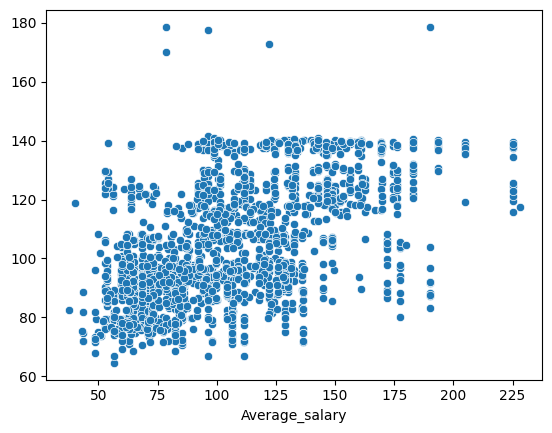

In [298]:
# compare actual average salary with predcited values
sns.scatterplot(x=y_test, y=predictions)

In [299]:
residual= y_test-predictions

<ipython-input-300-90a96fcef58f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50);


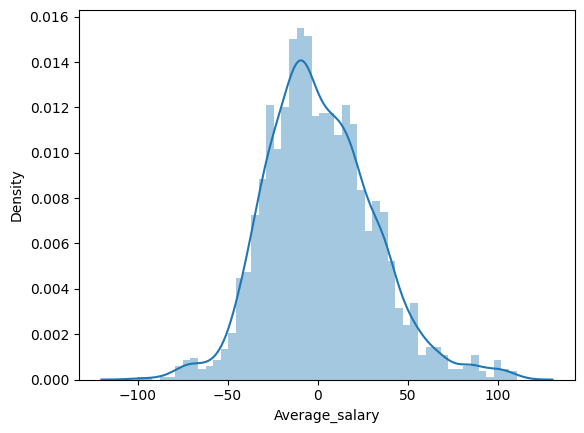

In [300]:
sns.distplot(residual,bins=50);

In [309]:
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 23.68754750028052


In [312]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, predictions)
print('R2:',R2)


R2: 0.2750096985928344


## Save the Model

In [313]:
pickle.dump(lr, open('Salary_Estimater.pkl' , 'wb'))